In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#1
df = pd.read_csv("medical_examination.csv", index_col="id")

df

In [ ]:
#2
df['BMI'] = df["weight"] / ((df["height"]/100) ** 2)

#df['overweight'] = np.where(df['BMI'] > 25, 1, 0)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)

df

In [ ]:
#3
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)

df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

df


In [ ]:
#4 
#5
df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat = df_cat.sort_values(by='variable')

df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].size().reset_index(name='total')

df_cat

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 7))

# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

sns.catplot(data=df_cat, col='cardio', x='variable', y='total', hue='value', kind='bar')


In [ ]:
df.shape

In [19]:
#11

df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

df_heat = df_heat.reset_index()

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63254,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
63255,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
63256,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
63257,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [20]:
# 12
corr = df_heat.corr()

corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000025,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110267,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135588,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.266305,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.862657,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024925,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.216786,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.167416,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.121930,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041652,-0.003274


In [21]:
# 13
mask = np.triu(np.ones_like(corr, dtype=bool))

mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

<Axes: >

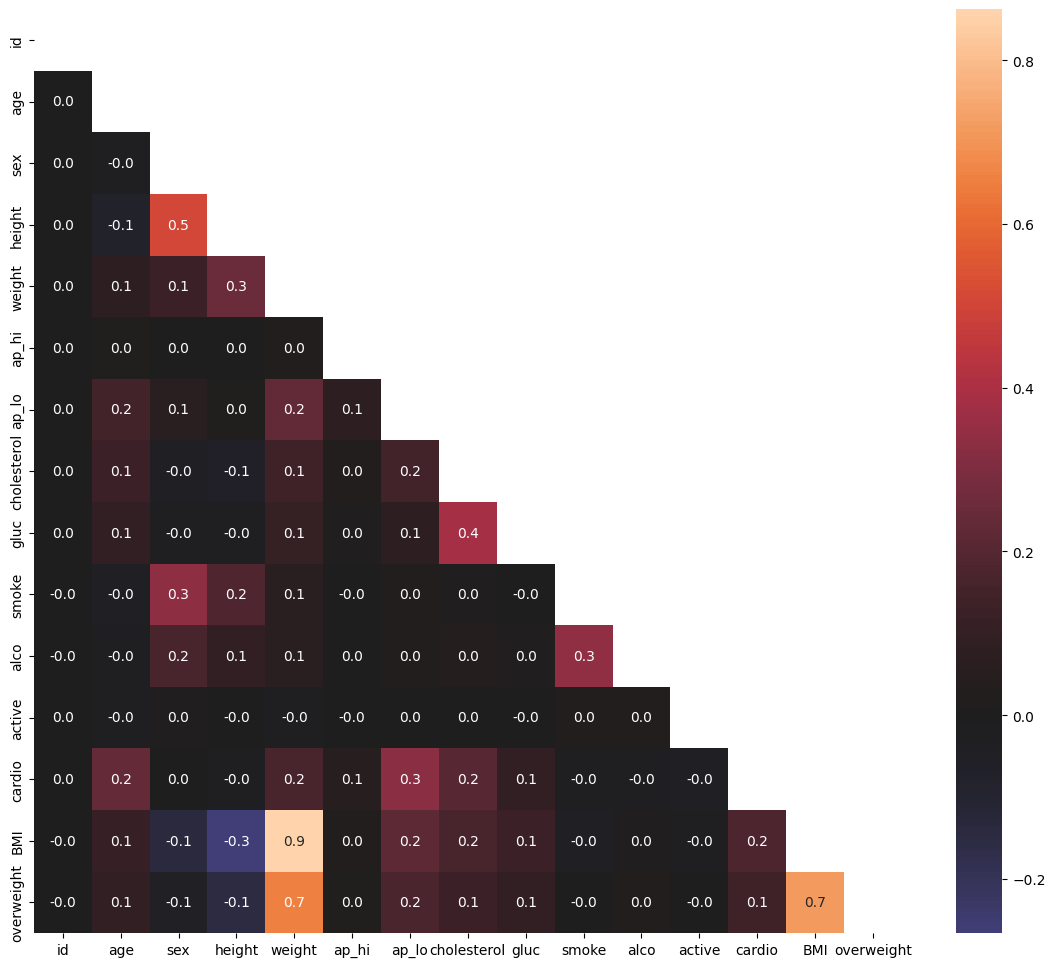

In [33]:
# 14
fig, ax = plt.subplots(figsize=(14, 12))

#15
sns.color_palette("icefire", as_cmap=True)
sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt='.1f', center=0)

#, center=0.0, cmap='twilight'
#plt.show()
